# Засоби підготовки та налізу даних
## Лабораторна робота №4_2
## ФБ-22 Лаптєв Денис


### Підготовка середовища

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
print ('setup complete')

setup complete


#### Завантаження датасету

In [75]:
def load_data(id = 2): #45; 2
    url = "https://archive.ics.uci.edu/static/public/"+str(id)+"/data.csv"
    filename = "data/data_2.csv"

    urllib.request.urlretrieve(url, filename)



def create_df():
    df = pd.read_csv("data/data_2.csv")
    return df

#load_data()
df = create_df()

In [78]:
def miss_values(df):
    missing_values_count = df.eq('?').sum()
    print(missing_values_count)

    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    print("percent of missing values:",str(round(total_missing/total_cells * 100, 2))+"%")

df.info()
miss_values(df)

#df.workclass.nunique()
#df.workclass.unique()
#print(df)
#df.to_csv('output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
age                  0
workclass         1836
fnlwgt               0
education            0
e

C:\Users\Denys\AppData\Local\Temp\ipykernel_14632\2618316834.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  miss_value(df)


#### Хід роботи
Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними.
2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі 4 функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
6. Провести One Hot Encoding категоріального string атрибуту.
7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of- effective-visualization-of-multi-dimensional-data-6c7202990c57.

In [73]:
#1
def fight_NaN(df):
    col_with_miss = ['native-country', 'workclass', 'occupation'] # ordered by raising amount of miss values
    for i in col_with_miss:
        most_popular_value = df[i].value_counts().idxmax()
        df.loc[df[i] == '?', i] = most_popular_value

def DropAndForget(df):
    col_with_miss = ['native-country', 'workclass', 'occupation']
    for i in col_with_miss:
        df = df.drop(df.loc[df[i] =='?'].index)

fight_NaN(df)
#DropAndForget(df)
print(df.eq('?').sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
#2
result_df = (df-min(df))/(max(df)-min(df))
standart_df = (df - mean(df))/std(df)

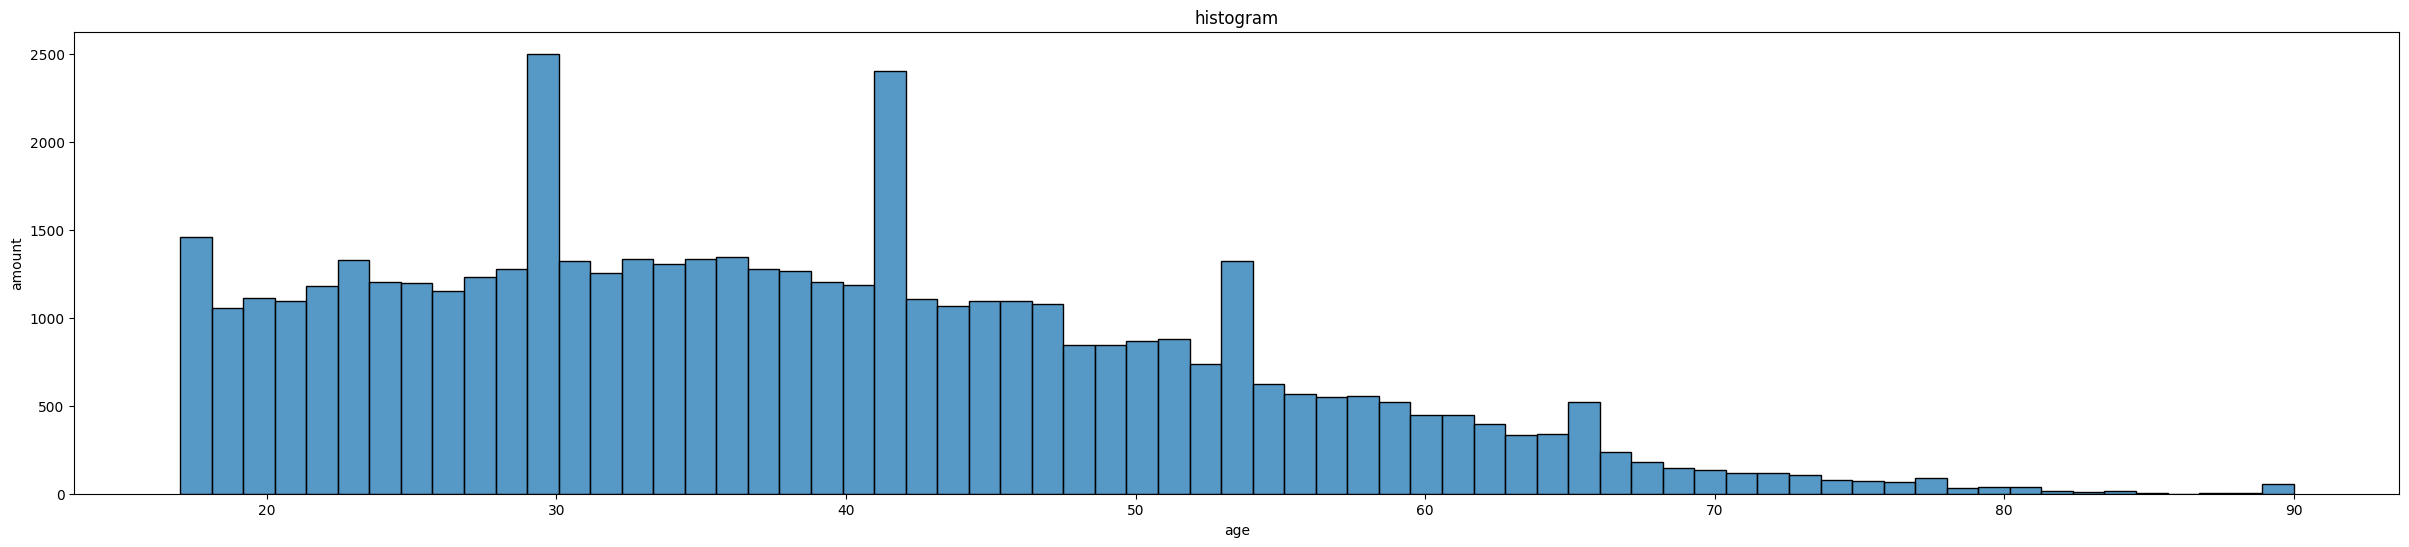

In [79]:
#3
def plot(df, cat):
    plt.figure(figsize=(30,6))
    plt.title("histogram")
    plt.xlabel(cat)
    plt.ylabel("amount")
    sns.histplot(df[cat])
    
cat = 'age'

plot(result_df, cat)